In [1]:
import subtle.subtle_loss as suloss
from subtle.dnn.helpers import load_model, load_data_loader
from subtle.dnn.generators import GeneratorUNet2D
from subtle.dnn.adversaries import AdversaryPatch2D
from subtle.dnn.helpers import gan_model
from subtle.data_loaders import SliceLoader
import os

import matplotlib.pyplot as plt

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 8)

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

W1003 12:26:56.595612 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/projects/SubtleGad/subtle/subtle_loss.py:20: The name tf.log is deprecated. Please use tf.math.log instead.

Using TensorFlow backend.
/home/srivathsa/projects/SubtleGad/subtle/subtle_loss.py:32: UserWarning: import keras_contrib failed, replacing ssim loss with L1 loss
  warnings.warn('import keras_contrib failed, replacing ssim loss with L1 loss')


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [3]:
loss_function = suloss.mixed_loss(l1_lambda=0.5, ssim_lambda=0.5)
metrics_monitor = [suloss.l1_loss, suloss.ssim_loss, suloss.mse_loss]

model_kwargs = {
    'num_channel_output': 1,
    'num_filters_first_conv': 32,
    'num_poolings': 3,
    'loss_function': loss_function,
    'metrics_monitor': metrics_monitor,
    'lr_init': 0.001,
    'batch_norm': False,
    'verbose': 1,
    'img_rows': 240,
    'img_cols': 240,
    'num_channel_input': 14
}

model = GeneratorUNet2D(**model_kwargs)

W1003 12:27:01.956537 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 12:27:01.976542 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 12:27:01.979629 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 12:27:02.010172 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

Building standard model...
Tensor("input_1:0", shape=(?, 240, 240, 14), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 240, 240, 32), dtype=float32) Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 120, 120, 32), dtype=float32)
Tensor("conv2d_6/Relu:0", shape=(?, 120, 120, 64), dtype=float32) Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 60, 60, 64), dtype=float32)
Tensor("conv2d_9/Relu:0", shape=(?, 60, 60, 128), dtype=float32) Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 30, 30, 128), dtype=float32)
Tensor("add_1/add:0", shape=(?, 30, 30, 128), dtype=float32)
Tensor("conv2d_13/Relu:0", shape=(?, 60, 60, 128), dtype=float32) Tensor("concatenate_1/concat:0", shape=(?, 60, 60, 256), dtype=float32)
Tensor("conv2d_16/Relu:0", shape=(?, 120, 120, 64), dtype=float32) Tensor("concatenate_2/concat:0", shape=(?, 120, 120, 192), dtype=float32)


W1003 12:27:02.257398 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Tensor("conv2d_19/Relu:0", shape=(?, 240, 240, 32), dtype=float32) Tensor("concatenate_3/concat:0", shape=(?, 240, 240, 96), dtype=float32)
Tensor("conv2d_20/BiasAdd:0", shape=(?, 240, 240, 1), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 14) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 240, 32) 4064        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 240, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________

In [4]:
gen = model.model
d = AdversaryPatch2D(
    img_rows=240, img_cols=240, compile_model=True
)
disc = d.model

W1003 12:27:05.449209 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1003 12:27:06.743381 140138909034304 deprecation_wrapper.py:119] From /home/srivathsa/miniconda3/envs/py35gad/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Tensor("batch_normalization_1/cond/Merge:0", shape=(?, 120, 120, 32), dtype=float32)
Tensor("batch_normalization_3/cond/Merge:0", shape=(?, 60, 60, 64), dtype=float32)
Tensor("batch_normalization_5/cond/Merge:0", shape=(?, 30, 30, 128), dtype=float32)
Tensor("batch_normalization_7/cond/Merge:0", shape=(?, 30, 30, 256), dtype=float32)
Tensor("activation_1/Sigmoid:0", shape=(?, 30, 30, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 240, 240, 1)       0         
_________________________________________________________________
conv_s_n2d_1 (ConvSN2D)      (None, 240, 240, 32)      352       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 240, 240, 32)      0         
_________________________________________________________________
conv_s_n2d_2 (ConvSN2D)      (None, 120, 120, 32)      9280      


In [9]:
gan = gan_model(gen, disc, (240, 240, 14))

gan.load_weights('/home/srivathsa/projects/studies/gad/tiantan/train/checkpoints/tiantan_gan.checkpoint')

In [10]:
fpath_h5 = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data/NO29.h5'

pred_gen = SliceLoader(
    data_list=[fpath_h5],
    batch_size=8,
    shuffle=False,
    verbose=1,
    residual_mode=False,
    slices_per_input=7,
    slice_axis=[0]
)

In [11]:
y_pred = gen.predict_generator(pred_gen)

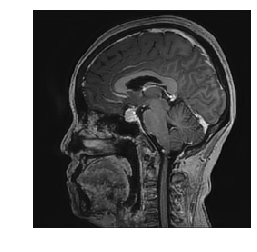

In [12]:
show_img(y_pred[96, ..., 0])